<a href="https://colab.research.google.com/github/NabilHanifA/Klasifikasi_Gambar_C1/blob/main/Klasifikasi_Gambar_Kelompok_1_C1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kelompok 1
1. Meiva Labibah Putri (2204343)
2. Nabil Hanif Achmaddiredja (2205905)
3. Tattha Maharany Yasmin Akbar (2201805)
4. Muhammad Yusdan Ali Batubara (2206847)
5. Ahmad Taufiq Hidayat (2202074)

Pengenalan objek adalah salah satu aspek kunci dalam Deep Learning, yang memungkinkan mesin  memahami dan mengklasifikasikan objek di lingkungannya. Dalam kesempatan ini, kami mencoba untuk membandingkan dan memahami perbedaan antara beberapa kelompok hewan, seperti sapi, anjing, burung, ikan, dan ular, yang dapat menjadi tantangan menarik dalam pengenalan objek.

# Import library

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib

## Menghubungkan Google Colab dengan Google Drive. Berikut akan meminta izin akses ke Google Drive dan membuat folder khusus 'drive' di Colab.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Menentukan path direktori tempat dataset disimpan di Google Drive.

In [ ]:
# download dataset
data_root = "/content/drive/MyDrive/KULIAH/SEMESTER 3/DATA MINING/KELOMPOK 1/DATA TRAINING"
data_dir = pathlib.Path(data_root)


## Menampilkan data_root untuk memverifikasi path direktori dataset.

In [ ]:
print(data_root)

/content/drive/MyDrive/KULIAH/SEMESTER 3/DATA MINING/KELOMPOK 1/DATA TRAINING


## Menampilkan tipe data dari data_root.

In [ ]:
print(type(data_root))

<class 'str'>


## Menghitung jumlah instance dalam dataset.

In [ ]:
# jumlah instance dataset
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)


675


Menggunakan library os dan pathlib untuk mendapatkan informasi tentang struktur direktori dataset. Lalu menampilkan jumlah dataset setiap kelas.

In [ ]:
import os
list_dir = [os.path.basename(x) for x in data_dir.iterdir() if x.is_dir()]
print("Jumlah class: {} ".format(len(list_dir)))
print("Jumlah instance per class")
for x in list_dir:
  print("{} = {} ".format(x,len(list(data_dir.glob('{}/*.jpg'.format(x))))))



Jumlah class: 5 
Jumlah instance per class
Sapi = 118 
Burung = 181 
Ikan = 141 
Ular = 135 
Anjing = 100 


Menggunakan pathlib untuk mendapatkan list semua item (file dan direktori) dalam data_dir dan menampilkan jumlah kelas.

In [ ]:
x = list(data_dir.glob('*'));
class_count = len(x)
print(class_count)
print(x)

5
[PosixPath('/content/drive/MyDrive/KULIAH/SEMESTER 3/DATA MINING/KELOMPOK 1/DATA TRAINING/Sapi'), PosixPath('/content/drive/MyDrive/KULIAH/SEMESTER 3/DATA MINING/KELOMPOK 1/DATA TRAINING/Burung'), PosixPath('/content/drive/MyDrive/KULIAH/SEMESTER 3/DATA MINING/KELOMPOK 1/DATA TRAINING/Ikan'), PosixPath('/content/drive/MyDrive/KULIAH/SEMESTER 3/DATA MINING/KELOMPOK 1/DATA TRAINING/Ular'), PosixPath('/content/drive/MyDrive/KULIAH/SEMESTER 3/DATA MINING/KELOMPOK 1/DATA TRAINING/Anjing')]


Menampilkan tipe data dari data_dir.

In [ ]:
print(type(data_dir))

<class 'pathlib.PosixPath'>


# Mengecek data menggunakan pathlib

## Menampilkan Gambar Anjing

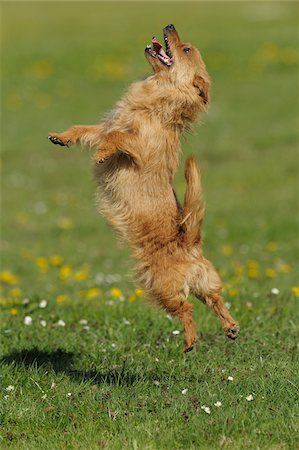

In [ ]:
anjing = list(data_dir.glob('Anjing/*'))
PIL.Image.open(str(anjing[0]))


## Menampilkan Gambar Burung

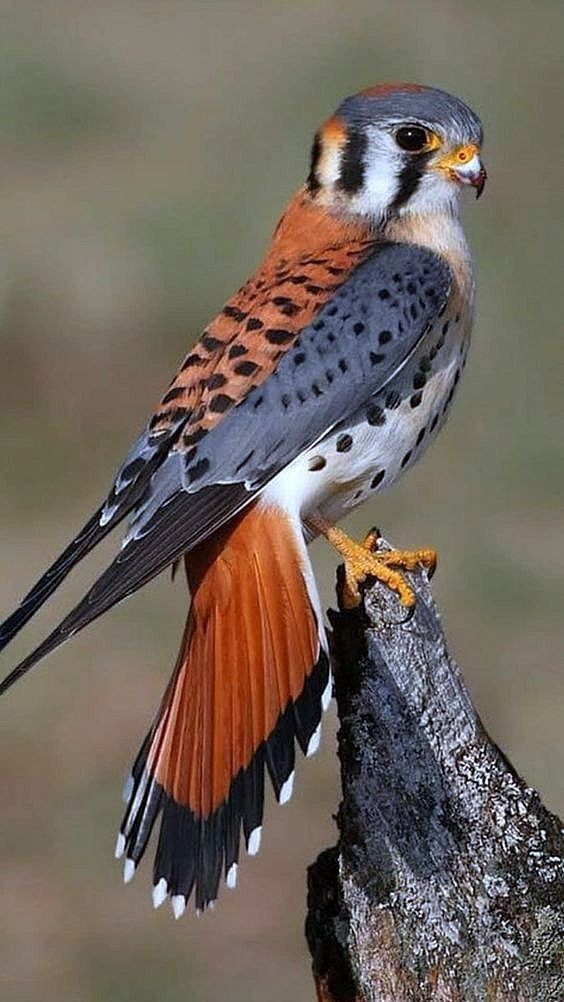

In [ ]:
burung = list(data_dir.glob('Burung/*'))
PIL.Image.open(str(burung[0]))


## Menampilkan Gambar Ikan

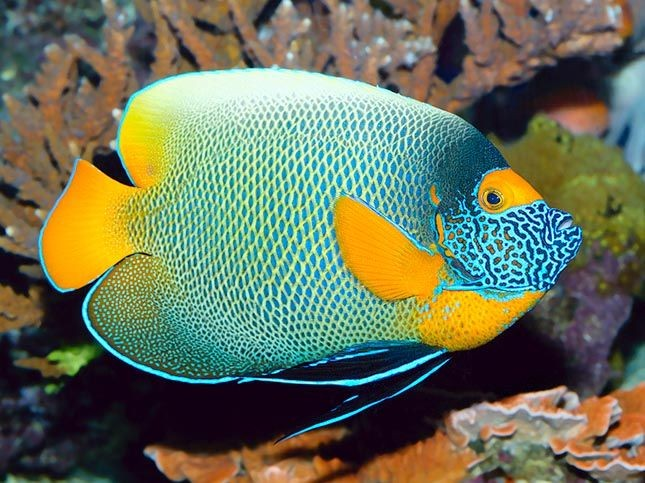

In [ ]:
ikan = list(data_dir.glob('Ikan/*'))
PIL.Image.open(str(ikan[0]))

## Menampilkan Gambar Sapi

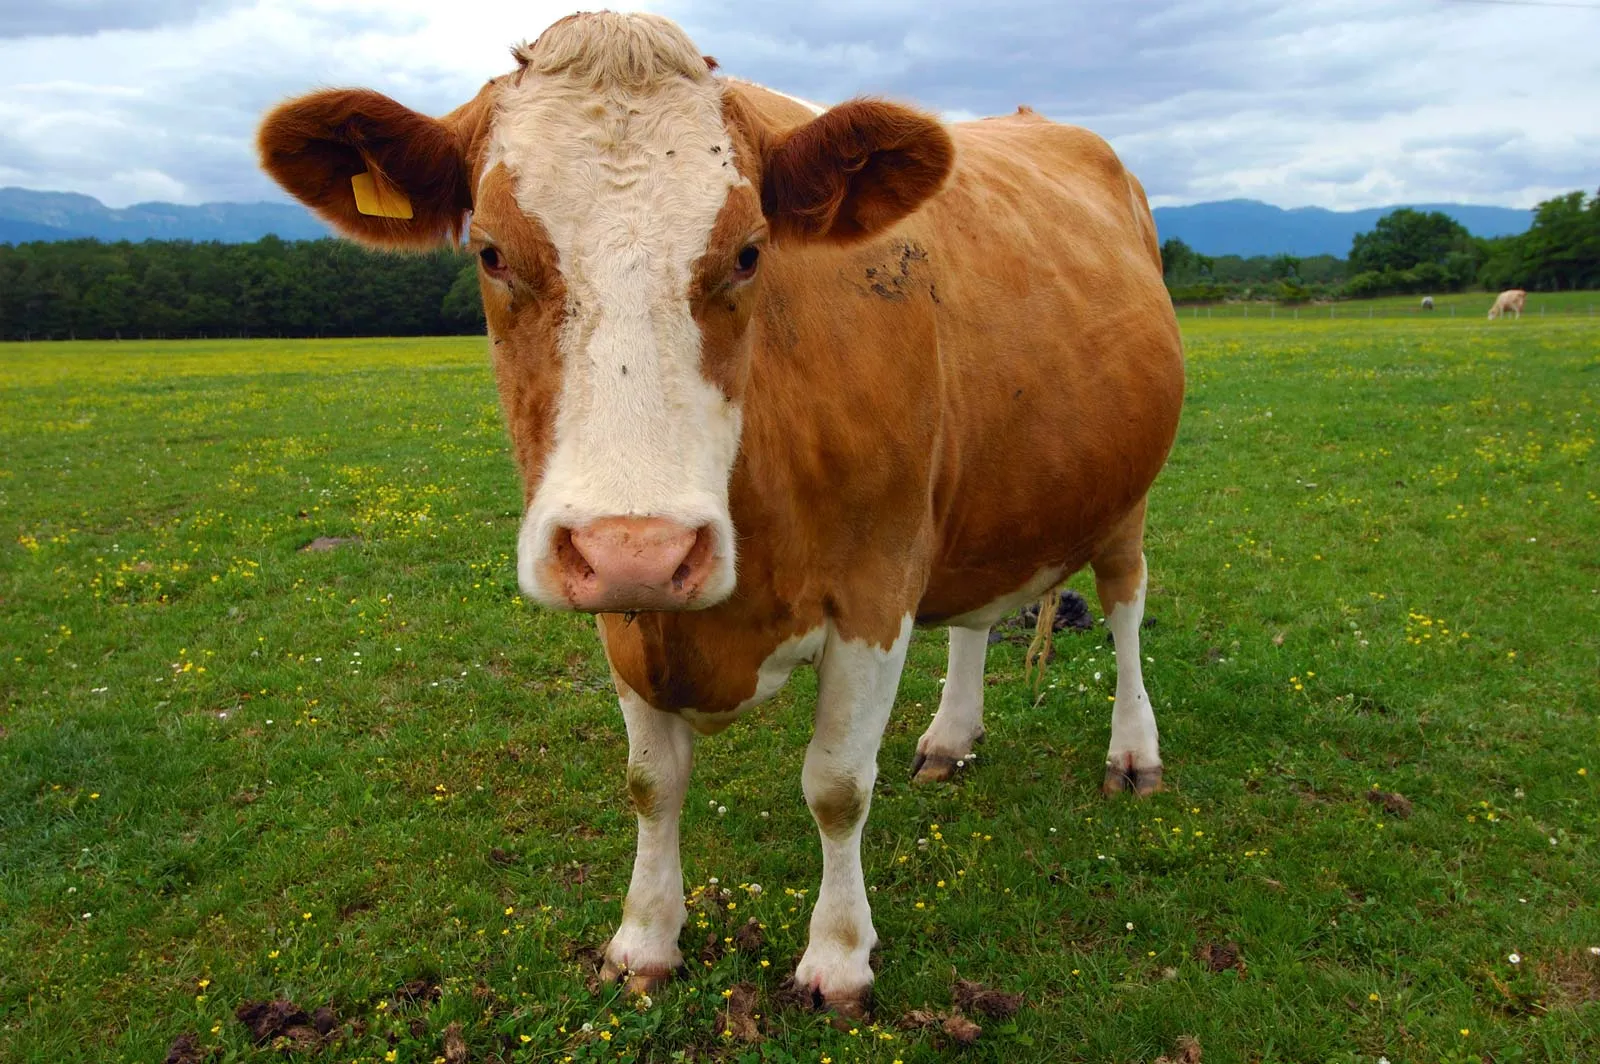

In [ ]:
sapi = list(data_dir.glob('Sapi/*'))
PIL.Image.open(str(sapi[0]))

## Menampilkan Gambar Ular

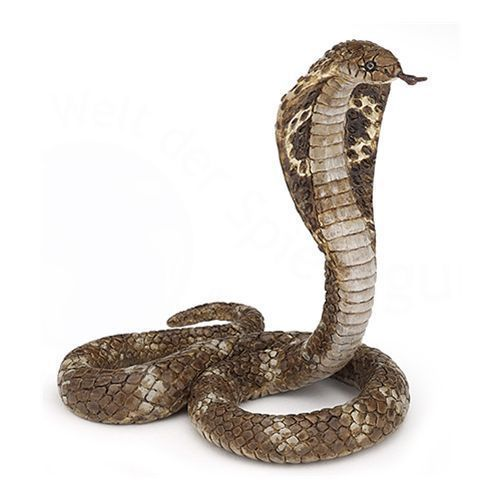

In [ ]:
ular = list(data_dir.glob('Ular/*'))
PIL.Image.open(str(ular[0]))


# Membuat model klasifikasi

## Menentukan ukuran batch, tinggi gambar, dan lebar gambar untuk penggunaan dalam model.

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

## Membuat data training dengan menggunakan fungsi image_dataset_from_directory dari direktori gambar dengan ukuran 0.8

In [ ]:
# menggunakan library dari keras.utils
# langsung mempersiapkan dataset dari directory
# train

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 675 files belonging to 5 classes.
Using 540 files for training.


Menampilkan beberapa batch pertama dari dataset pelatihan.

In [ ]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

## Membuat data validasi dengan menggunakan fungsi image_dataset_from_directory dari direktori gambar dengan ukuran 0.2

In [ ]:
# validasi

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 675 files belonging to 5 classes.
Using 135 files for validation.


Menampilkan beberapa batch pertama dari dataset validasi.

In [ ]:
val_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

## Menampilkan daftar nama kelas dari dataset pelatihan.

In [ ]:
class_names = train_ds.class_names
print(class_names)


['Anjing', 'Burung', 'Ikan', 'Sapi', 'Ular']


Melakukan pengecekan pada data yang formatnya tidak sesuai (bukan .jpg)

In [ ]:
# from pathlib import Path
# import imghdr

# image_extensions = [".png", ".jpg"]  # add there all your images file extensions

# img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
# for filepath in Path(data_dir).rglob("*"):
#     if filepath.suffix.lower() in image_extensions:
#         img_type = imghdr.what(filepath)
#         if img_type is None:
#             print(f"{filepath} is not an image")
#         elif img_type not in img_type_accepted_by_tf:
#             print(f"{filepath} is a {img_type}, not accepted by TensorFlow")

# Menampilkan contoh gambar dari dataset pelatihan dan Mengambil satu batch gambar dari dataset pelatihan lalu di tampilkan dalam 3x3.

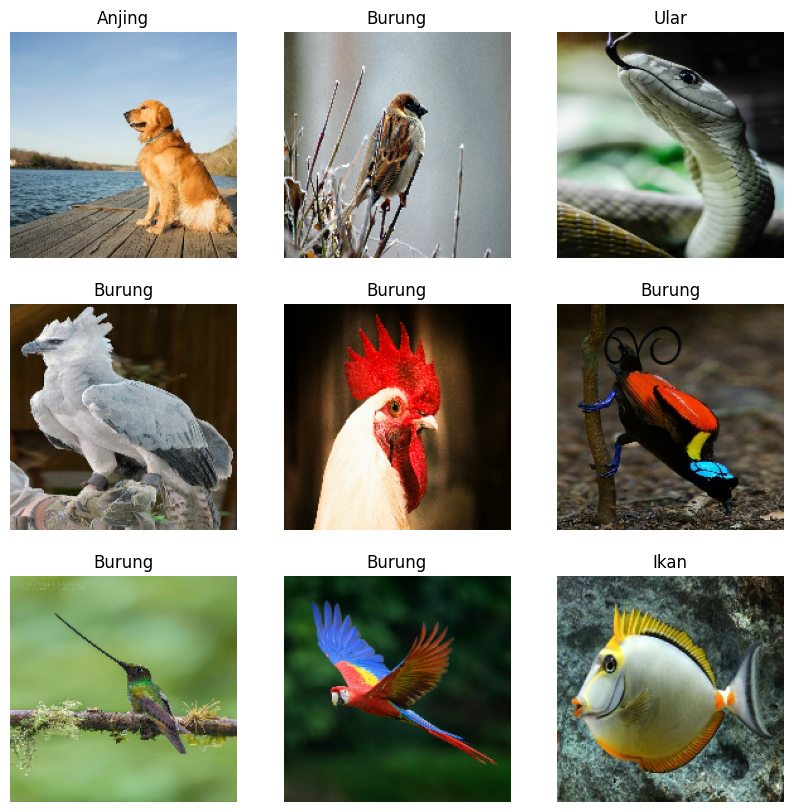

In [ ]:
# lihat dataset training
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1) # 3 baris, 3 kolom
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [ ]:
# 32 per batch, 180x180 pixel, warna 3 (RGB)
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break


(32, 180, 180, 3)
(32,)


# Melakukan klasifikasi pada model

## Menambahkan beberapa optimisasi pada dataset untuk meningkatkan kinerjanya. Menggunakan caching untuk mempercepat akses ke dataset pelatihan.

In [ ]:
#agar kinerja bagus
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [ ]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

## Melakukan normalisasi nilai RGB pada gambar. Normalisasi dilakukan dengan menggunakan lapisan (layer) Rescaling dari pustaka TensorFlow.

In [ ]:
# normalisasi nilai RGB
normalization_layer = layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# nilai dari [0 sd 255] menjadi [0 sd 1]
print(np.min(first_image), np.max(first_image))


0.0 1.0


## Mendefinisikan arsitektur model neural network menggunakan library TensorFlow, dengan beberapa lapisan(layer) yang berbeda.

In [ ]:
# definisikan model
num_classes = len(class_names)
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  # layers.Conv2D(128, 3, padding='same', activation='relu'),
  # layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

proses kompilasi dari model tensorflow

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [ ]:
model.summary()


Model: "sequential_67"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_67 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_203 (Conv2D)         (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_203 (MaxPool  (None, 90, 90, 16)        0         
 ing2D)                                                          
                                                                 
 conv2d_204 (Conv2D)         (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_204 (MaxPool  (None, 45, 45, 32)        0         
 ing2D)                                                          
                                                                 
 conv2d_205 (Conv2D)         (None, 45, 45, 64)      

## Proses pelatihan (training) model neural network menggunakan TensorFlow.

In [ ]:
# training
# memerlukan waktu cukup lama
# dengan cpu= 20 menit
# dngan T4 tdk sampai 1 menit
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/20
17/17 [==============================] - 5s 195ms/step - loss: 2.0408 - accuracy: 0.2389 - val_loss: 1.5112 - val_accuracy: 0.2889
Epoch 2/20
17/17 [==============================] - 0s 27ms/step - loss: 1.3243 - accuracy: 0.4907 - val_loss: 1.5676 - val_accuracy: 0.3481
Epoch 3/20
17/17 [==============================] - 0s 24ms/step - loss: 1.0603 - accuracy: 0.5611 - val_loss: 1.3762 - val_accuracy: 0.4519
Epoch 4/20
17/17 [==============================] - 0s 26ms/step - loss: 0.8186 - accuracy: 0.6981 - val_loss: 1.4410 - val_accuracy: 0.5259
Epoch 5/20
17/17 [==============================] - 0s 26ms/step - loss: 0.6452 - accuracy: 0.7870 - val_loss: 1.2568 - val_accuracy: 0.6296
Epoch 6/20
17/17 [==============================] - 0s 26ms/step - loss: 0.4145 - accuracy: 0.8704 - val_loss: 1.4901 - val_accuracy: 0.5630
Epoch 7/20
17/17 [==============================] - 0s 25ms/step - loss: 0.2655 - accuracy: 0.9185 - val_loss: 1.4907 - val_accuracy: 0.5852
Epoch 8/20
1

### Menampilkan metrik performa model (akurasi dan loss) selama proses pelatihan (training) dan validasi.

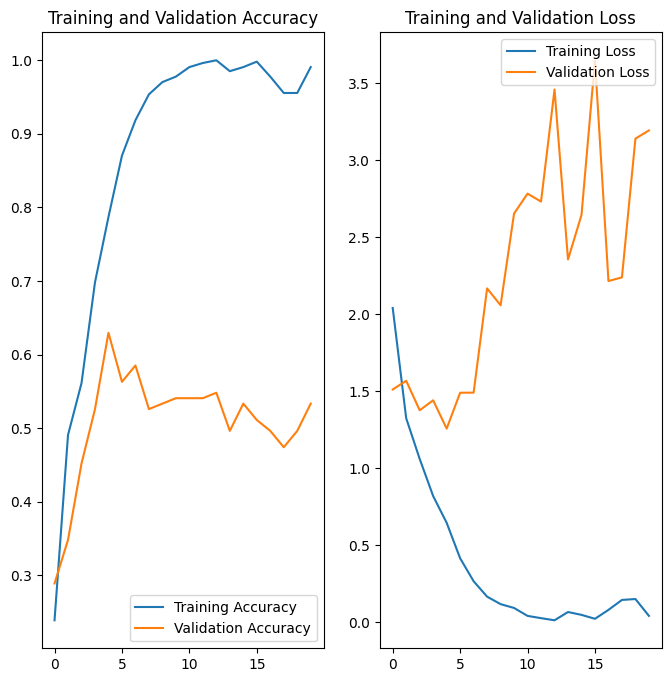

In [ ]:
# plot
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


# Melakukan perbaikan model yang overfit

## Penggunaan lapisan (layer) dari TensorFlow yang bertujuan untuk melakukan augmentasi data pada gambar.

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.3),
    layers.RandomZoom(0.1),
  ]
)


## Melakukan visualisasi dari hasil augmentasi data pada gambar menggunakan lapisan data_augmentation yang telah didefinisikan sebelumnya.

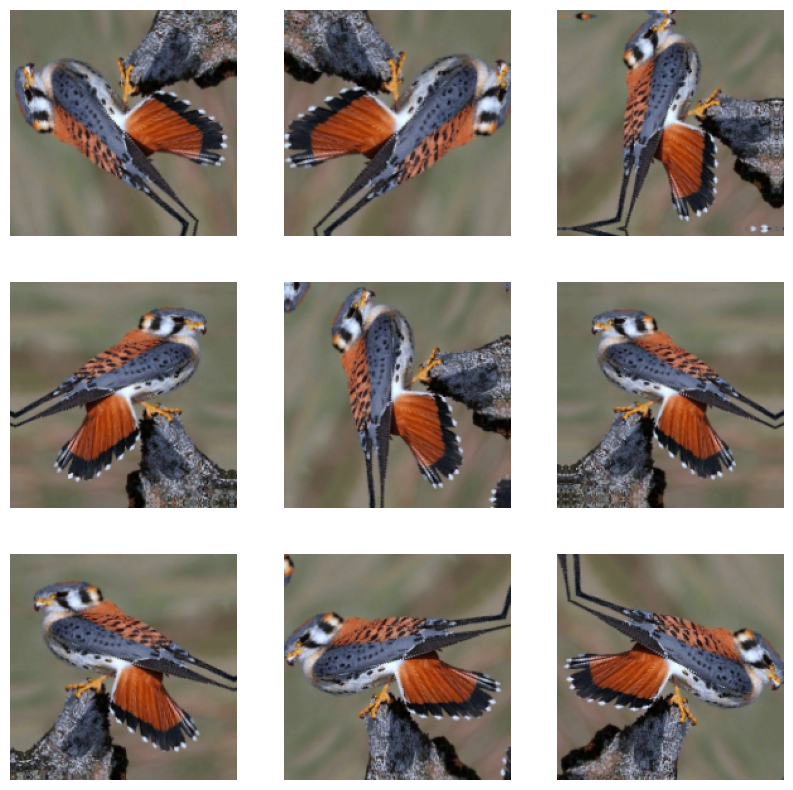

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")


## Menambahkan dropout dan jumlah layers Conv2D

In [ ]:

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])


proses kompilasi dari model tensorflow

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [ ]:
model.summary()


Model: "sequential_77"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_68 (Sequential)  (None, 180, 180, 3)       0         
                                                                 
 rescaling_76 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_232 (Conv2D)         (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_232 (MaxPool  (None, 90, 90, 16)        0         
 ing2D)                                                          
                                                                 
 conv2d_233 (Conv2D)         (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_233 (MaxPool  (None, 45, 45, 32)        0         
 ing2D)                                              

## Proses pelatihan (training) model neural network menggunakan TensorFlow.

In [ ]:
# perlu waktu agak lama
# epoch terlalu gede?
# cpu = 33 menit.
# T4 tidak sampai 1 menit
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/20
17/17 [==============================] - 3s 56ms/step - loss: 1.5982 - accuracy: 0.2333 - val_loss: 1.6154 - val_accuracy: 0.2074
Epoch 2/20
17/17 [==============================] - 1s 38ms/step - loss: 1.5455 - accuracy: 0.2611 - val_loss: 1.6679 - val_accuracy: 0.2815
Epoch 3/20
17/17 [==============================] - 1s 36ms/step - loss: 1.4866 - accuracy: 0.3593 - val_loss: 1.6111 - val_accuracy: 0.3407
Epoch 4/20
17/17 [==============================] - 1s 38ms/step - loss: 1.4517 - accuracy: 0.3889 - val_loss: 1.5075 - val_accuracy: 0.3111
Epoch 5/20
17/17 [==============================] - 1s 37ms/step - loss: 1.3346 - accuracy: 0.4667 - val_loss: 1.3460 - val_accuracy: 0.4815
Epoch 6/20
17/17 [==============================] - 1s 35ms/step - loss: 1.3288 - accuracy: 0.5037 - val_loss: 1.4809 - val_accuracy: 0.4222
Epoch 7/20
17/17 [==============================] - 1s 35ms/step - loss: 1.1512 - accuracy: 0.5685 - val_loss: 2.1016 - val_accuracy: 0.3407
Epoch 8/20
17

### Menampilkan metrik performa model (akurasi dan loss) selama proses pelatihan (training) dan validasi.

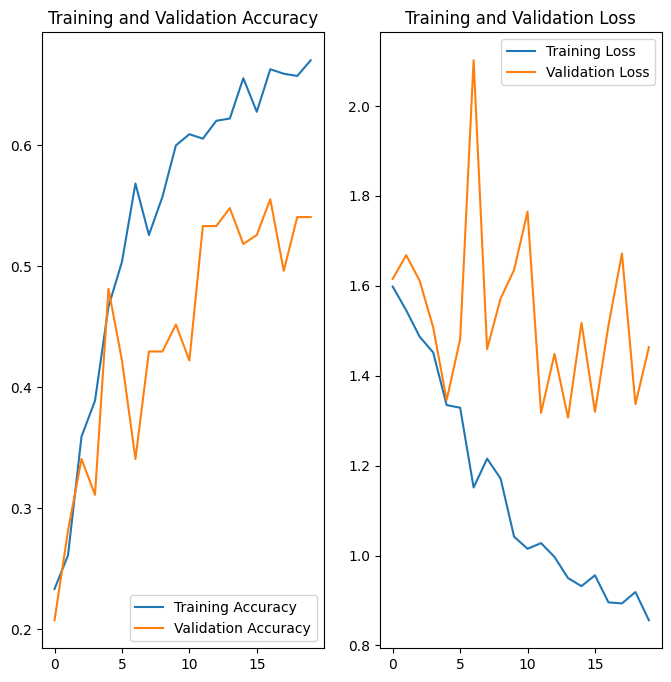

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


# Memprediksi jenis foto yang belum pernah dilihat sebelumnya

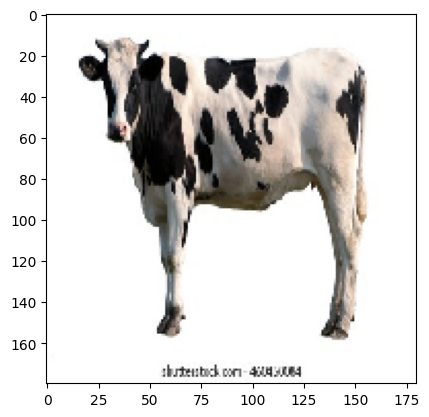

In [ ]:
#Sapi
image_baru_url = "https://www.shutterstock.com/image-photo/black-white-cow-isolated-260nw-460450084.jpg"
image_baru_path = tf.keras.utils.get_file('Sapi2', origin=image_baru_url)
img = tf.keras.utils.load_img(
    image_baru_path, target_size=(img_height, img_width)
)
plt.imshow(img)

In [ ]:
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


1/1 [==============================] - 0s 21ms/step
This image most likely belongs to Sapi with a 98.74 percent confidence.


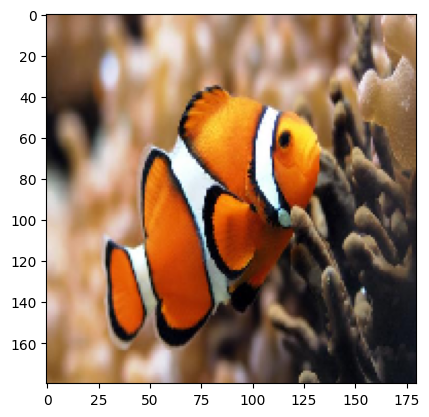

In [ ]:
#Ikan
image_baru_url = "https://asset-2.tstatic.net/jogja/foto/bank/images/ikan-giru-clownfish_20160301_195231.jpg"
image_baru_path = tf.keras.utils.get_file('Ikan3', origin=image_baru_url)
img = tf.keras.utils.load_img(
    image_baru_path, target_size=(img_height, img_width)
)
plt.imshow(img)

In [ ]:
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


1/1 [==============================] - 0s 26ms/step
This image most likely belongs to Ikan with a 78.35 percent confidence.


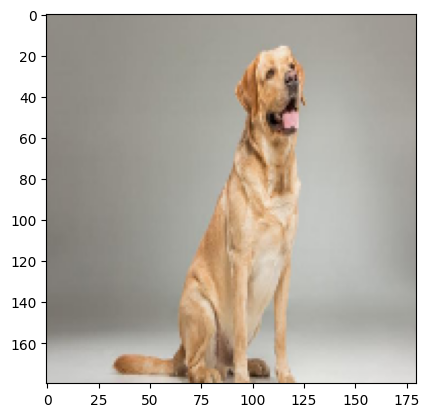

In [ ]:
#Anjing
image_baru_url = "https://asset-2.tstatic.net/tribunnews/foto/bank/images/thailand-berhasil-latih-anjing-labrador-yang-bisa-deteksi-virus-corona-dalam-beberapa-detik-saja.jpg"
image_baru_path = tf.keras.utils.get_file('Anjing4', origin=image_baru_url)
img = tf.keras.utils.load_img(
    image_baru_path, target_size=(img_height, img_width)
)
plt.imshow(img)


In [ ]:
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


1/1 [==============================] - 0s 23ms/step
This image most likely belongs to Anjing with a 57.34 percent confidence.


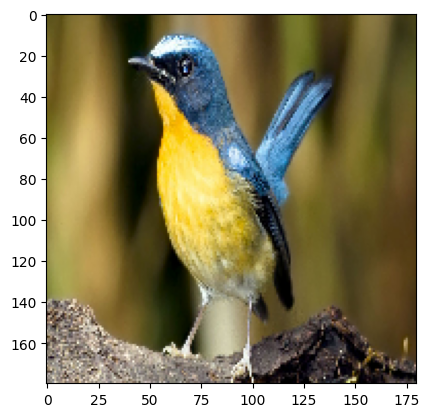

In [ ]:
#Burung
image_baru_url = "https://www.kanalkalimantan.com/wp-content/uploads/2018/05/burung.jpg"
image_baru_path = tf.keras.utils.get_file('Burung', origin=image_baru_url)
img = tf.keras.utils.load_img(
    image_baru_path, target_size=(img_height, img_width)
)
plt.imshow(img)

In [ ]:
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 30ms/step
This image most likely belongs to Burung with a 99.67 percent confidence.


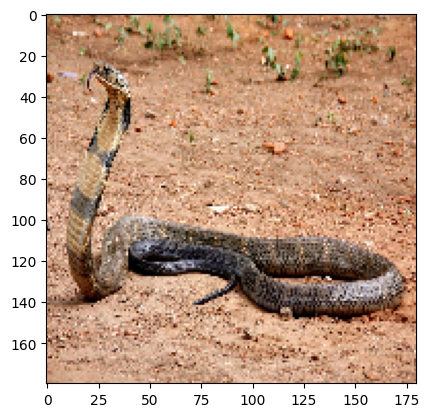

In [ ]:
#Ular
image_baru_url = "https://asset.kompas.com/crops/_JO7wCUSQYTE8XOXPTdXBblhMQU=/2x3:998x667/750x500/data/photo/2022/09/05/6315fa56c7c93.jpg"
image_baru_path = tf.keras.utils.get_file('Ular', origin=image_baru_url)
img = tf.keras.utils.load_img(
    image_baru_path, target_size=(img_height, img_width)
)
plt.imshow(img)

In [ ]:
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


1/1 [==============================] - 0s 29ms/step
This image most likely belongs to Ular with a 83.97 percent confidence.
